In [12]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the stock price data
data = pd.read_csv('/content/ASIANPAINT.csv')

In [3]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [4]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [5]:
# Create the training and testing datasets
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)


In [6]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [8]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
131/131 [==============================] - 22s 136ms/step - loss: 0.0047
Epoch 2/10
131/131 [==============================] - 10s 74ms/step - loss: 0.0011
Epoch 3/10
131/131 [==============================] - 13s 97ms/step - loss: 9.4815e-04
Epoch 4/10
131/131 [==============================] - 10s 74ms/step - loss: 9.1891e-04
Epoch 5/10
131/131 [==============================] - 10s 78ms/step - loss: 6.7110e-04
Epoch 6/10
131/131 [==============================] - 13s 99ms/step - loss: 5.9964e-04
Epoch 7/10
131/131 [==============================] - 11s 86ms/step - loss: 5.3095e-04
Epoch 8/10
131/131 [==============================] - 9s 67ms/step - loss: 5.2157e-04
Epoch 9/10
131/131 [==============================] - 10s 76ms/step - loss: 4.0097e-04
Epoch 10/10
131/131 [==============================] - 10s 75ms/step - loss: 4.4499e-04


In [9]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


32/32 [==============================] - 1s 20ms/step


In [10]:
# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


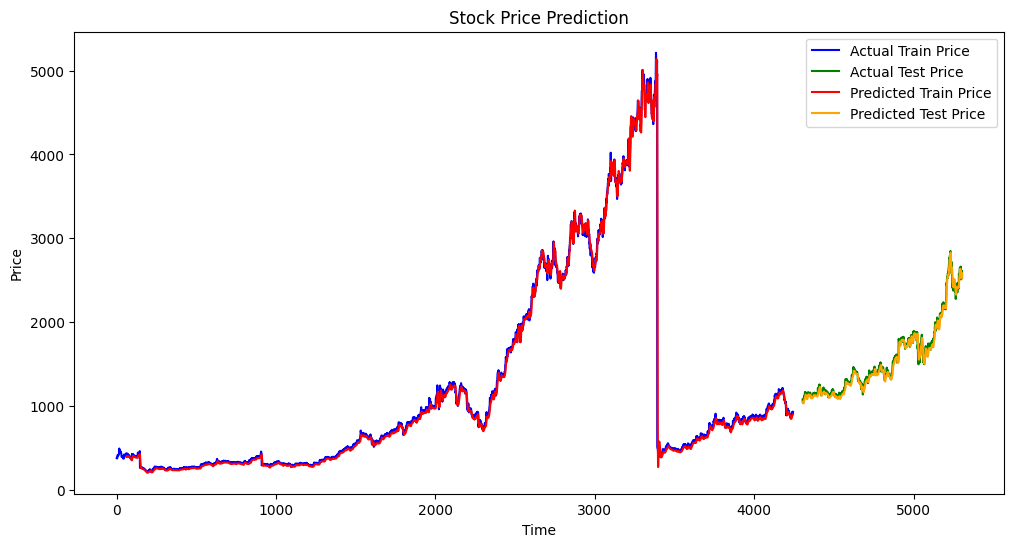

In [11]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'][:train_size], color='blue', label='Actual Train Price')
plt.plot(data['Close'][train_size+time_steps:], color='green', label='Actual Test Price')
plt.plot(range(time_steps, train_size), train_predictions, color='red', label='Predicted Train Price')
plt.plot(range(train_size+time_steps, len(data)), test_predictions, color='orange', label='Predicted Test Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
